<a href="https://colab.research.google.com/github/TAGARA-TECH/ChallengeTelecomX/blob/main/TelecomX_LATAM_copia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

##**Extracción de Datos: Cómo obtener los datos de la API de Telecom X (formato JSON) y convertirlos a un DataFrame de Pandas.**

In [12]:
import pandas as pd
import requests

# URL del archivo JSON crudo
url = 'https://raw.githubusercontent.com/TAGARA-TECH/ChallengeTelecomX/main/TelecomX_Data.json'

# Obtener los datos desde la "API"
response = requests.get(url)
data_json = response.json()

# Convertir a DataFrame
df = pd.DataFrame(data_json)

# Mostrar las primeras filas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

##**Conozca el Conjunto de Datos: Entender la estructura y significado de las columnas, y usar el diccionario de datos.**
https://github.com/TAGARA-TECH/ChallengeTelecomX/blob/main/TelecomX_diccionario.md

In [13]:
import pandas as pd
import requests


# Exploración inicial
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nEstadísticas descriptivas generales:")
print(df.describe(include='all'))

print("\nPrimeras filas:")
print(df.head())


Dimensiones del dataset: (7267, 6)

Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Estadísticas descriptivas generales:
        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count                                             7267   
unique                                               3   
top     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
freq 

el código que desanida las columnas 'customer', 'phone', 'internet' y 'account' y las incorpora al DataFrame principal

In [14]:
# Expandir columnas anidadas
customer_expanded = pd.json_normalize(df['customer'])
phone_expanded = pd.json_normalize(df['phone'])
internet_expanded = pd.json_normalize(df['internet'])
account_expanded = pd.json_normalize(df['account'])

# Unir todo en un único DataFrame
df_clean = pd.concat([df[['customerID', 'Churn']], customer_expanded, phone_expanded, internet_expanded, account_expanded], axis=1)

# Verificar el resultado
print("Nuevas dimensiones:", df_clean.shape)
print(df_clean.head())


Nuevas dimensiones: (7267, 21)
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes             

In [15]:
# TelecomX_EDA_Inicial.ipynb

# Cargar librerías
import pandas as pd
import requests

# 1. Cargar datos desde JSON en GitHub
url = 'https://raw.githubusercontent.com/TAGARA-TECH/ChallengeTelecomX/main/TelecomX_Data.json'
response = requests.get(url)
data_json = response.json()

# 2. Convertir a DataFrame inicial
df = pd.DataFrame(data_json)

# 3. Verificar estructura inicial
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nValores nulos por columna:\n", df.isnull().sum())
print("\nPrimeras filas:\n", df.head())

# 4. Expandir columnas anidadas
customer_expanded = pd.json_normalize(df['customer'])
phone_expanded = pd.json_normalize(df['phone'])
internet_expanded = pd.json_normalize(df['internet'])
account_expanded = pd.json_normalize(df['account'])

# 5. Unir todo en un único DataFrame limpio
df_clean = pd.concat(
    [df[['customerID', 'Churn']], customer_expanded, phone_expanded, internet_expanded, account_expanded],
    axis=1
)

# 6. Verificar DataFrame resultante
print("Nuevas dimensiones:", df_clean.shape)
print(df_clean.head())


Dimensiones del dataset: (7267, 6)

Tipos de datos:
 customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Valores nulos por columna:
 customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Primeras filas:
    customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines':

#📊 Carga y análisis

### Análisis Exploratorio de Datos Inicial (EDA)

En esta etapa inicial se realiza una primera exploración del dataset limpio para:

- Verificar el equilibrio de clases en la variable objetivo `Churn`.
- Comprender las distribuciones de variables categóricas y numéricas.
- Detectar posibles valores atípicos, errores de carga o desbalances severos.
- Identificar relaciones iniciales entre características y la variable objetivo.

Esto permitirá formular hipótesis y definir próximos pasos, como limpieza más profunda, visualizaciones específicas o selección de variables para modelado predictivo.


<ipython-input-17-2062113034>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Churn', palette='Set2')


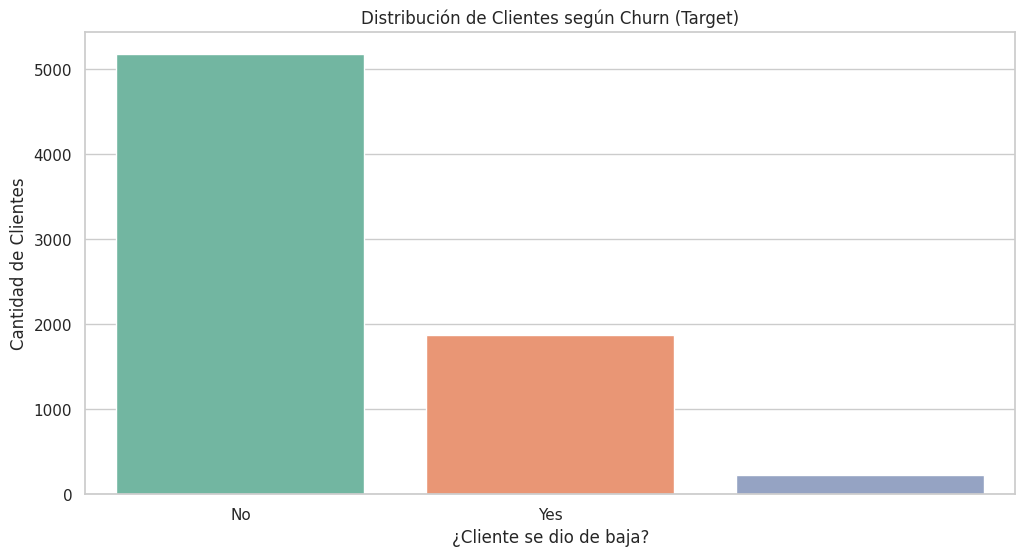

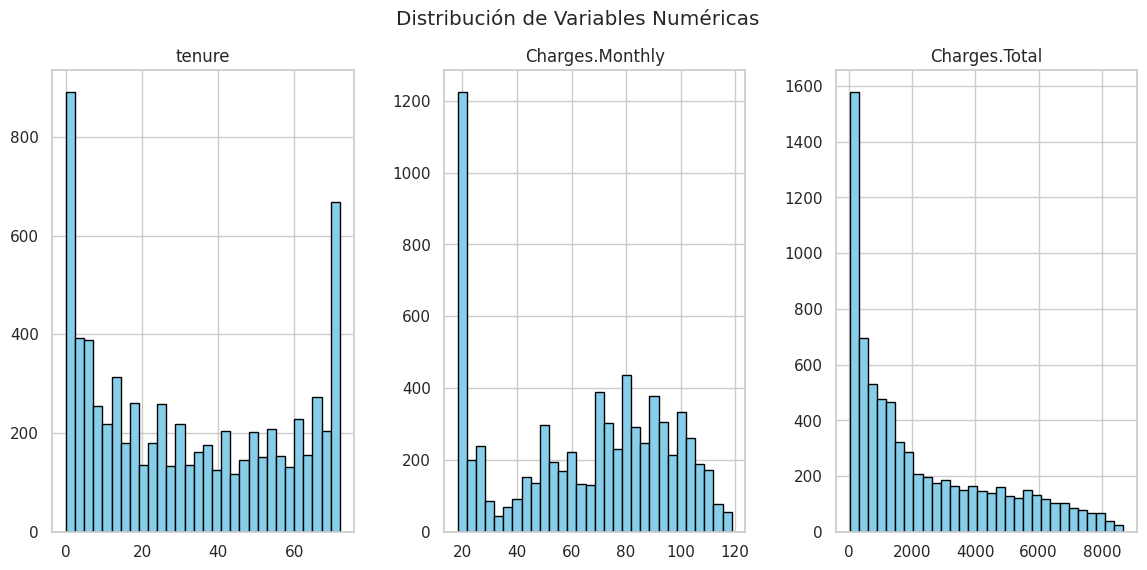

<ipython-input-17-2062113034>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='gender', ax=axes[0], palette='pastel')
<ipython-input-17-2062113034>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='SeniorCitizen', ax=axes[1], palette='muted')


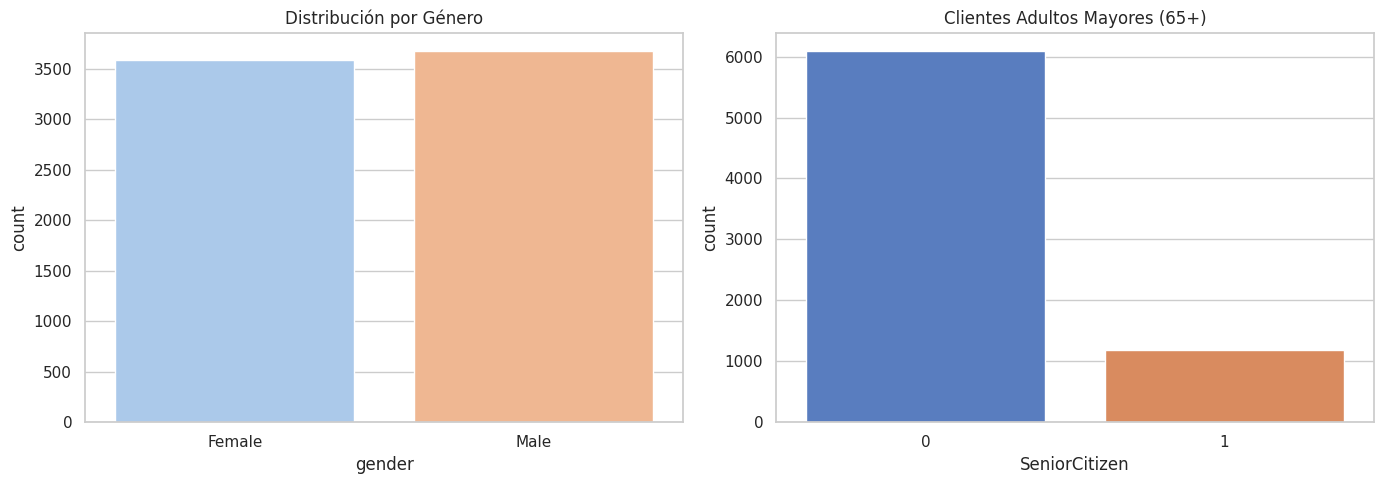

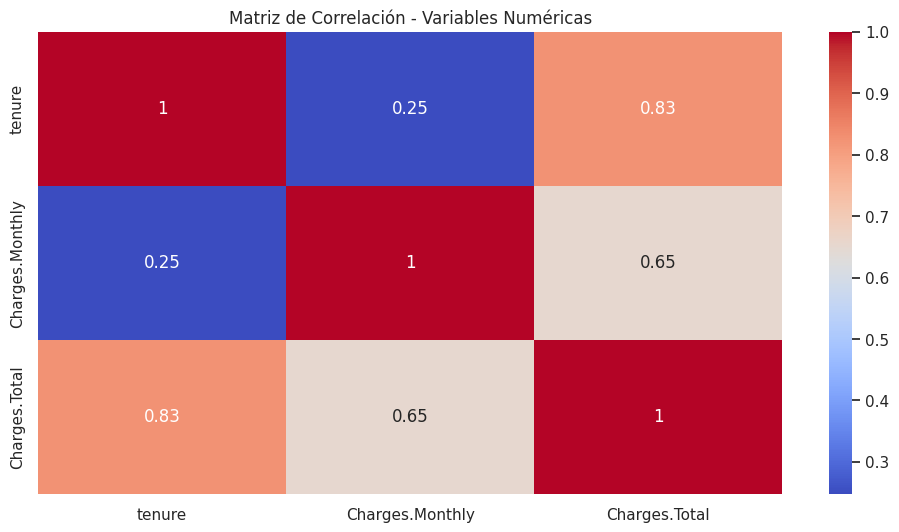

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes generales de estilo
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Distribución de la variable objetivo
sns.countplot(data=df_clean, x='Churn', palette='Set2')
plt.title('Distribución de Clientes según Churn (Target)')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('¿Cliente se dio de baja?')
plt.show()

# 2. Variables numéricas: tenure, Charges.Monthly, Charges.Total
num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
df_clean[num_cols] = df_clean[num_cols].apply(pd.to_numeric, errors='coerce')

df_clean[num_cols].hist(bins=30, figsize=(14, 6), layout=(1, 3), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

# 3. Distribución de géneros y clientes senior
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data=df_clean, x='gender', ax=axes[0], palette='pastel')
axes[0].set_title('Distribución por Género')
sns.countplot(data=df_clean, x='SeniorCitizen', ax=axes[1], palette='muted')
axes[1].set_title('Clientes Adultos Mayores (65+)')
plt.tight_layout()
plt.show()

# 4. Matriz de correlación entre variables numéricas
corr = df_clean[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()


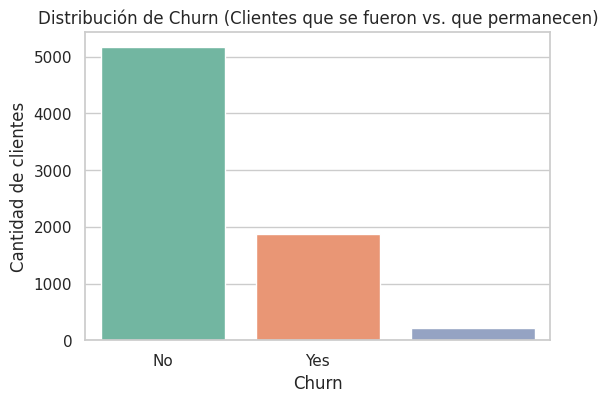

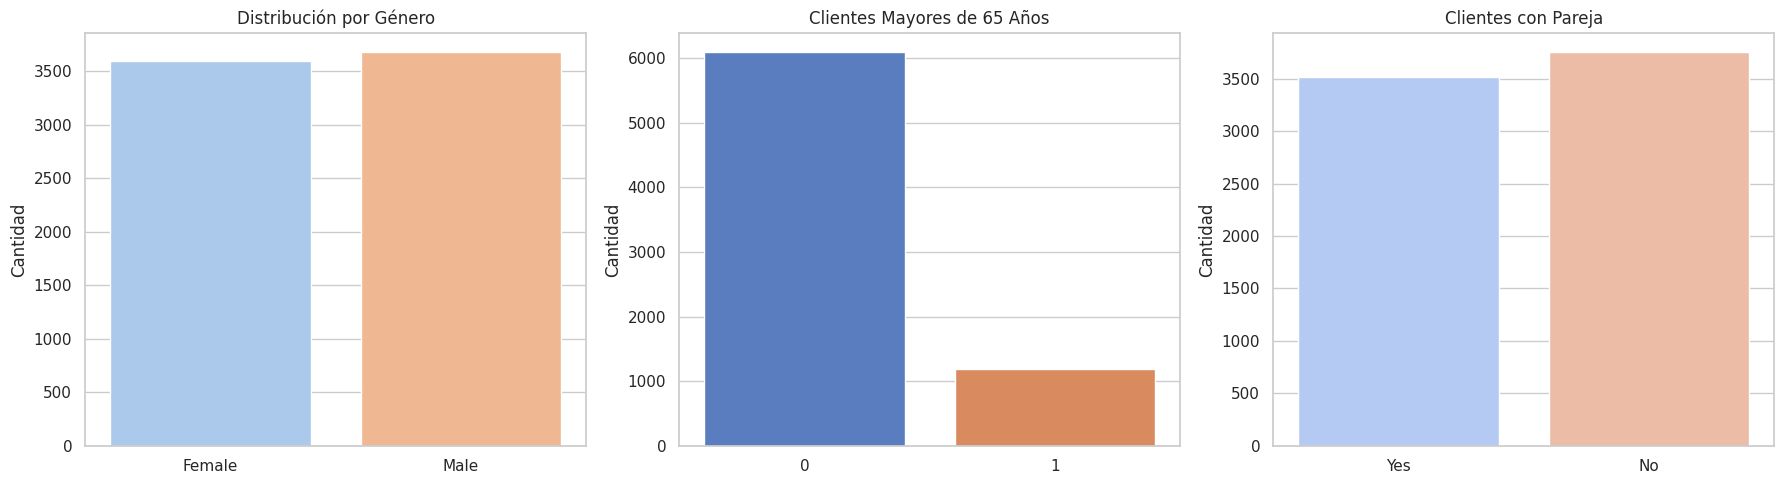

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")

# Figura para el gráfico de churn
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title("Distribución de Churn (Clientes que se fueron vs. que permanecen)")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Churn")
plt.show()

# Gráficos por variables demográficas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Género
sns.countplot(data=df_clean, x='gender', hue='gender', palette='pastel', legend=False, ax=axes[0])
axes[0].set_title("Distribución por Género")

# SeniorCitizen
sns.countplot(data=df_clean, x='SeniorCitizen', hue='SeniorCitizen', palette='muted', legend=False, ax=axes[1])
axes[1].set_title("Clientes Mayores de 65 Años")

# Partner
sns.countplot(data=df_clean, x='Partner', hue='Partner', palette='coolwarm', legend=False, ax=axes[2])
axes[2].set_title("Clientes con Pareja")

for ax in axes:
    ax.set_ylabel("Cantidad")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()


###** Limpieza avanzada o preprocesamiento: normalización, codificación, valores atípicos.**

###**1. Codificación de variables categóricas**

In [19]:
from sklearn.preprocessing import LabelEncoder

# Copiamos el DataFrame limpio
df_model = df_clean.copy()

# Codificación binaria con LabelEncoder
le = LabelEncoder()
binary_cols = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling']

for col in binary_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Variables categóricas no binarias: One-hot encoding
df_model = pd.get_dummies(df_model, columns=[
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
], drop_first=True)

df_model.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,1,0,0,1,1,9,1,1,65.6,...,True,False,True,False,False,True,False,False,False,True
1,0003-MKNFE,1,1,0,0,0,9,1,0,59.9,...,False,False,False,False,True,False,False,False,False,True
2,0004-TLHLJ,2,1,0,0,0,4,1,1,73.9,...,False,False,False,False,False,False,False,False,True,False
3,0011-IGKFF,2,1,1,1,0,13,1,1,98.0,...,False,False,True,False,True,False,False,False,True,False
4,0013-EXCHZ,2,0,1,1,0,3,1,1,83.9,...,True,False,True,False,False,False,False,False,False,True


###**2. Conversión de columnas numéricas**
Aseguramos que Charges.Monthly y Charges.Total sean numéricas.

In [20]:
# Convertir a numérico, forzando errores como NaN
df_model['Charges.Monthly'] = pd.to_numeric(df_model['Charges.Monthly'], errors='coerce')
df_model['Charges.Total'] = pd.to_numeric(df_model['Charges.Total'], errors='coerce')

# Verificamos valores faltantes
df_model[['Charges.Monthly', 'Charges.Total']].isna().sum()


,0
Charges.Monthly,0
Charges.Total,11


###**3. Manejo de valores faltantes**
En este dataset, generalmente sólo hay unos pocos NaN en Charges.Total.

In [21]:
# Eliminamos filas con valores faltantes
df_model.dropna(inplace=True)


###**4. Detección de valores atípicos (opcional, explorativo)**

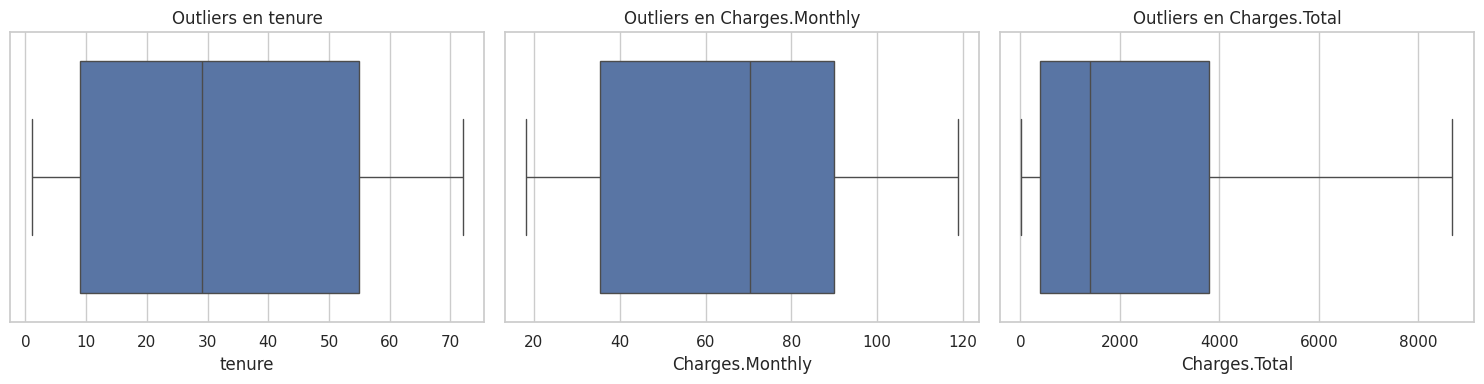

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots para detectar outliers en las columnas numéricas
numerical_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
plt.figure(figsize=(15, 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df_model[col])
    plt.title(f'Outliers en {col}')
plt.tight_layout()
plt.show()


###**5. Normalización (MinMaxScaler)**
Usamos MinMaxScaler para las columnas numéricas.

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_model[['tenure', 'Charges.Monthly', 'Charges.Total']] = scaler.fit_transform(
    df_model[['tenure', 'Charges.Monthly', 'Charges.Total']]
)


###**dataset limpio, numérico y escalado, ideal para clustering o modelos supervisados como regresión logística, árboles de decisión, random forest, etc.**

###**visualizaciones de correlación y selección de features**
Vamos ahora con dos pasos fundamentales del EDA avanzado:

###** 1. Visualización de Correlaciones**
Esto nos permite ver qué variables están más relacionadas con el Churn.

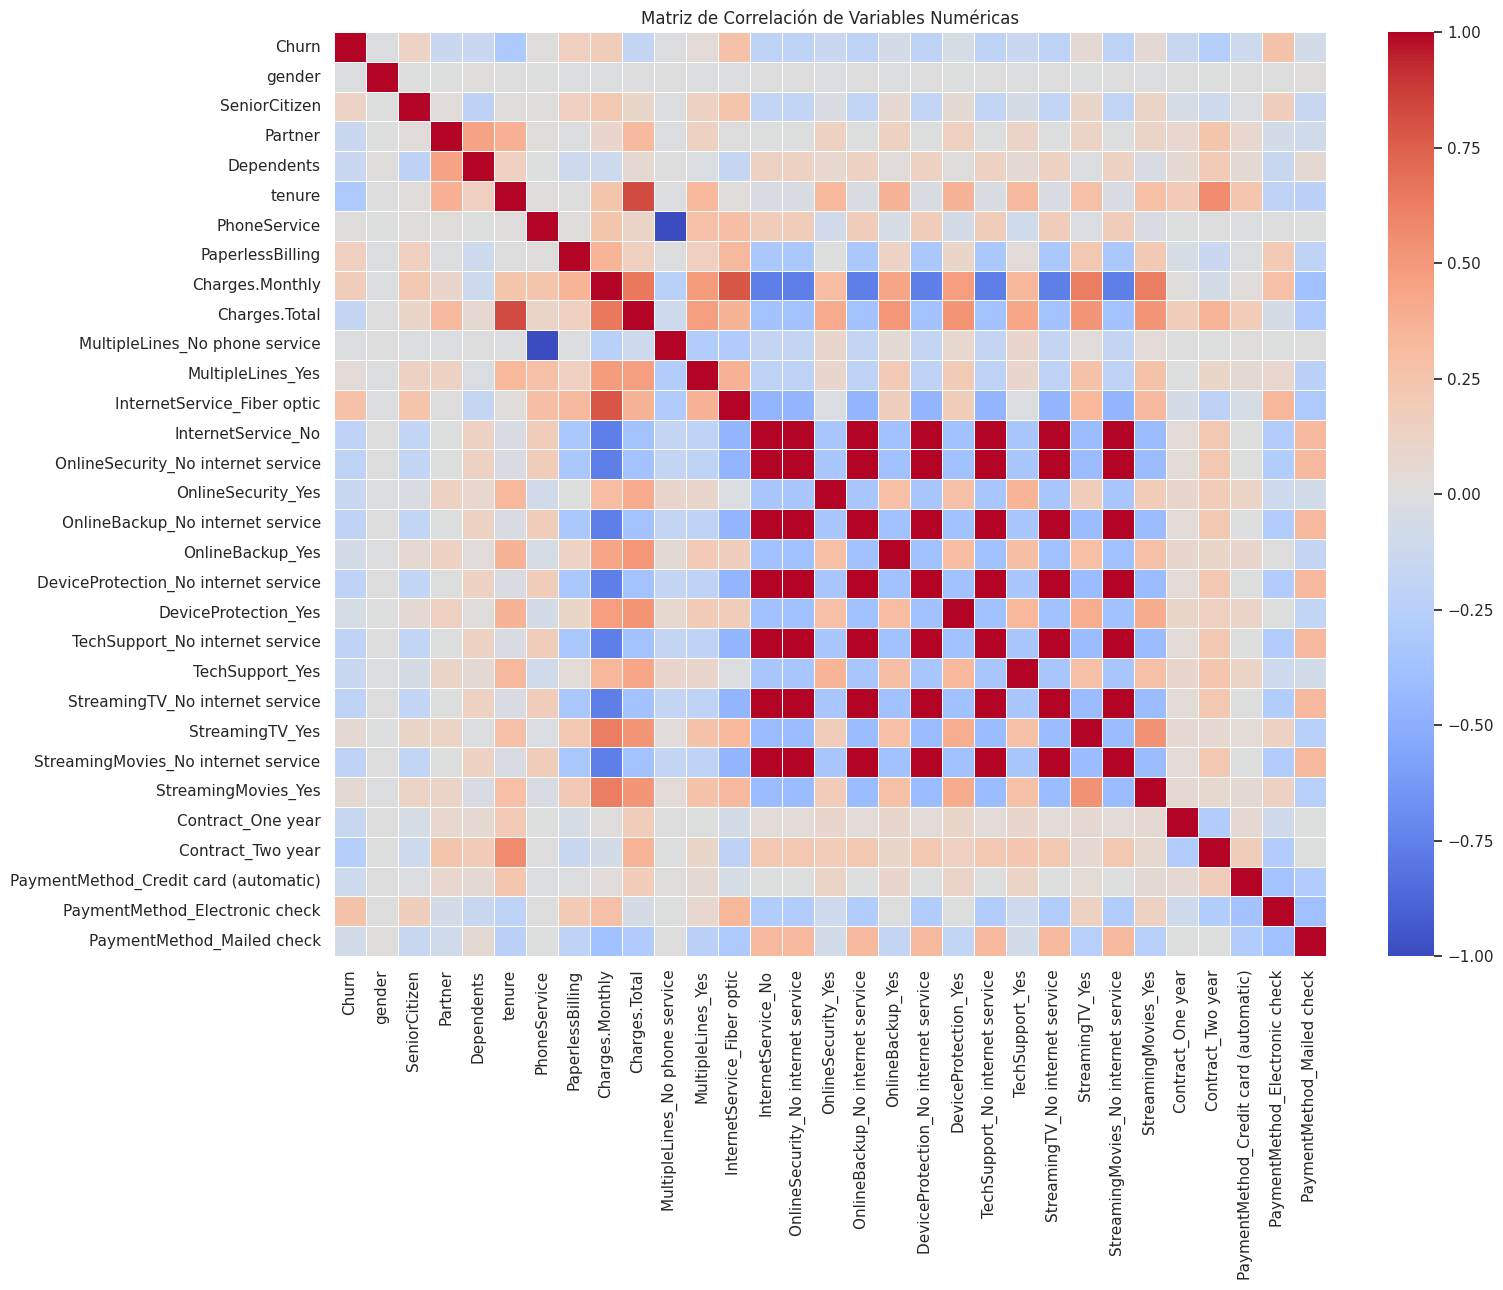

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación
correlation = df_model.corr(numeric_only=True)

# Visualizamos como heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


In [25]:
# Ordenamos correlaciones con respecto a Churn
cor_target = correlation['Churn'].sort_values(ascending=False)
print(cor_target)


Churn                                    1.000000
InternetService_Fiber optic              0.267957
PaymentMethod_Electronic check           0.261517
Charges.Monthly                          0.172934
PaperlessBilling                         0.163297
SeniorCitizen                            0.128800
StreamingTV_Yes                          0.057846
StreamingMovies_Yes                      0.055658
MultipleLines_Yes                        0.035561
PhoneService                             0.014173
gender                                  -0.012339
MultipleLines_No phone service          -0.014173
DeviceProtection_Yes                    -0.052377
OnlineBackup_Yes                        -0.070746
PaymentMethod_Mailed check              -0.081360
PaymentMethod_Credit card (automatic)   -0.116429
Partner                                 -0.137370
TechSupport_Yes                         -0.141120
Dependents                              -0.146498
OnlineSecurity_Yes                      -0.146723


###** 2. Selección de Features Relevantes**
Seleccionamos features con mayor correlación positiva o negativa con Churn.

Podés usar estas features para reducir dimensionalidad en modelos, análisis de importancia o visualizaciones más específicas.

In [26]:
# Filtramos variables con |correlación| > 0.1 con 'Churn'
important_features = cor_target[abs(cor_target) > 0.1]
important_features = important_features.drop('Churn')  # quitamos la propia columna target
print("Features más correlacionados con Churn:")
print(important_features)


Features más correlacionados con Churn:
InternetService_Fiber optic              0.267957
PaymentMethod_Electronic check           0.261517
Charges.Monthly                          0.172934
PaperlessBilling                         0.163297
SeniorCitizen                            0.128800
PaymentMethod_Credit card (automatic)   -0.116429
Partner                                 -0.137370
TechSupport_Yes                         -0.141120
Dependents                              -0.146498
OnlineSecurity_Yes                      -0.146723
Contract_One year                       -0.155987
Charges.Total                           -0.172300
InternetService_No                      -0.205349
StreamingTV_No internet service         -0.205349
OnlineSecurity_No internet service      -0.205349
OnlineBackup_No internet service        -0.205349
DeviceProtection_No internet service    -0.205349
StreamingMovies_No internet service     -0.205349
TechSupport_No internet service         -0.205349
Contract_T

###**Importancia de variables con Random Forest**

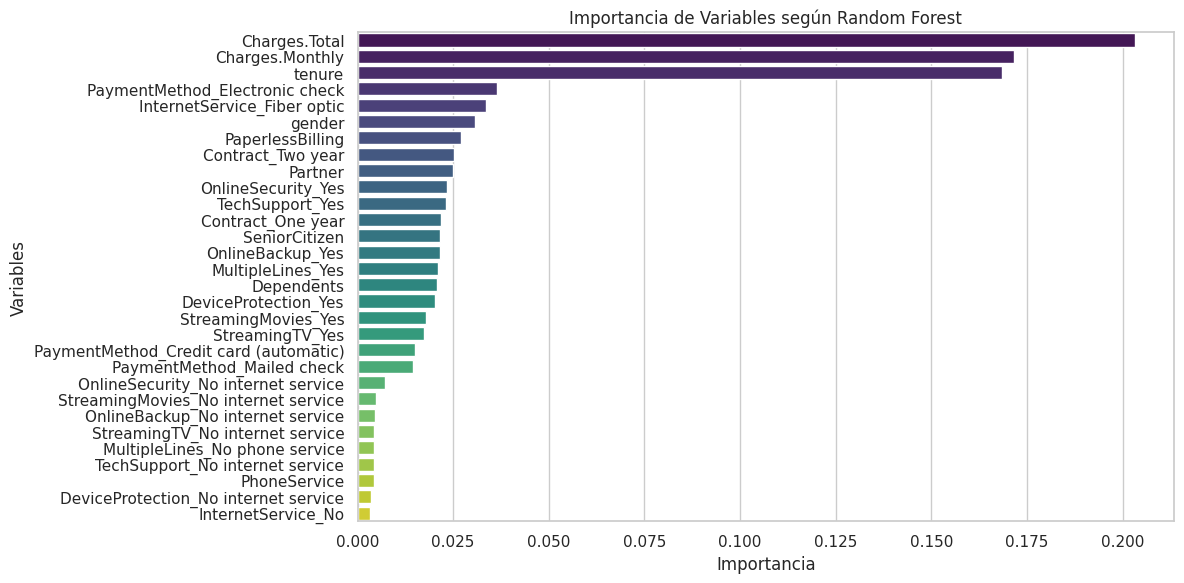

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir variables predictoras y target
X = df_model.drop(columns=['Churn', 'customerID'])
y = df_model['Churn']

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtener importancias
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Visualizar
plt.figure(figsize=(12, 6))
# Modificado para seguir la sugerencia de la advertencia
sns.barplot(x=importances[indices], y=feature_names[indices], hue=feature_names[indices], palette='viridis', legend=False)
plt.title("Importancia de Variables según Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


#📄Informe final